In [0]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

**State Vector**

Constant Acceleration Model in 2 Dimensions






![alt text](https://render.githubusercontent.com/render/math?math=x_k%3D%20%5Cleft%5B%20%5Cbegin%7Bmatrix%7D%20x%20%5C%5C%20y%20%5C%5C%20%5Cdot%20x%20%5C%5C%20%5Cdot%20y%20%5C%5C%20%5Cddot%20x%20%5C%5C%20%5Cddot%20y%20%5Cend%7Bmatrix%7D%20%5Cright%5D&mode=display)


[[0]
 [0]
 [0]
 [0]
 [0]
 [0]]


Text(0.5, 1.0, 'Initial Location')

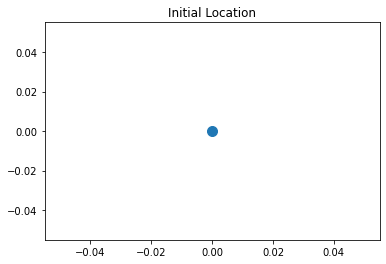

In [133]:
# X -> State Vector
# Dimensions = (nx,1) = 6,1
x = np.array([0, 0, 0, 0, 0, 0]).reshape((6, 1))
print(x)
# Number of states
nx = x.size
plt.scatter(float(x[0]),float(x[1]), s=100)
plt.title('Initial Location')

In [134]:
# P -> Estimate Uncertainty
# Dimensions = (nx,nx) = 6,6
P = np.diag([100,100,10,10,1,1])
print(P)

[[100   0   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0   0  10   0   0   0]
 [  0   0   0  10   0   0]
 [  0   0   0   0   1   0]
 [  0   0   0   0   0   1]]


**Time Step between Filter Steps**

In [135]:
dt = 0.1

# F -> State Transition Matrix
# Dimensions = (nx,nx) = 6,6
F = np.eye(6)
F[0,2] = dt
F[1,3] = dt
F[2,4] = dt
F[3,5] = dt
F[0,4] = 0.5 * dt ** 2
F[1,5] = 0.5 * dt ** 2
print(F)


[[1.    0.    0.1   0.    0.005 0.   ]
 [0.    1.    0.    0.1   0.    0.005]
 [0.    0.    1.    0.    0.1   0.   ]
 [0.    0.    0.    1.    0.    0.1  ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]]


In [136]:
# Observation Matrix
# Dimension = (nz,nx) = 4,6
H = np.zeros((4,6))
H[0,0] = 1
H[1,1] = 1
H[2,4] = 1
H[3,5] = 1

print(H)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [137]:
sa = 0.001
# G -> Control Matrix
# Dimension = (nx,nu) = (6,1)
G = np.array([[0.5*dt**2],
               [0.5*dt**2],
               [dt],
               [dt],
               [1.0],
               [1.0]]).reshape((6,1))
Q = G.dot(G.T)*sa**2
print(Q)

[[2.5e-11 2.5e-11 5.0e-10 5.0e-10 5.0e-09 5.0e-09]
 [2.5e-11 2.5e-11 5.0e-10 5.0e-10 5.0e-09 5.0e-09]
 [5.0e-10 5.0e-10 1.0e-08 1.0e-08 1.0e-07 1.0e-07]
 [5.0e-10 5.0e-10 1.0e-08 1.0e-08 1.0e-07 1.0e-07]
 [5.0e-09 5.0e-09 1.0e-07 1.0e-07 1.0e-06 1.0e-06]
 [5.0e-09 5.0e-09 1.0e-07 1.0e-07 1.0e-06 1.0e-06]]


In [138]:
I = np.eye(nx)
print(I)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


**Assumptions**


1.   Acceleration from IMU -> 10Hz
2.   Position from GPS -> 1Hz

Kalman Filter needs to handle the asynchronous measurements from GPS and IMU



In [139]:
# Noise of Acceleration Measurement
ra = 10**2
# Noise of Position Measurement
rp = 100**2
# R -> Measurement Uncertainty
# Dimensions = (nz,nz) = 4,4
R = np.zeros((4,4))
R[0,0] = rp
R[1,1] = rp
R[2,2] = ra
R[3,3] = ra
print(R) 

[[10000.     0.     0.     0.]
 [    0. 10000.     0.     0.]
 [    0.     0.   100.     0.]
 [    0.     0.     0.   100.]]


In [0]:
m = 700 # Number of measurements

sp = 1.0
px = 0.0
py = 0.0

mpx = np.array(px+sp*np.random.randn(m))
mpy = np.array(py+sp*(np.random.randn(m)))

# Generate GPS Trigger
GPS = np.ndarray(m,dtype='bool')
GPS[0] = True
for i in range(1,m):
    if i % 10 == 0:
        GPS[i] = True
    else:
        mpx[i] = mpx[i-1]
        mpy[i] = mpy[i-1]
        GPS[i] = False

In [141]:
GPS

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

# **Acceleration**
**Sigma for acceleration in X and Y**

In [0]:
sa = 0.1
ax = 0.0
ay = 0.0

mx = np.array(ax+sa*np.random.randn(m))
my = np.array(ay+sa*np.random.randn(m))

In [143]:
measurements = np.vstack((mpx,mpy,mx,my))
print(measurements.shape)

(4, 700)


In [144]:
measurements

array([[ 0.0376721 ,  0.0376721 ,  0.0376721 , ...,  0.83339373,
         0.83339373,  0.83339373],
       [-0.07867829, -0.07867829, -0.07867829, ..., -0.23496854,
        -0.23496854, -0.23496854],
       [ 0.10378027, -0.1438615 ,  0.05274364, ..., -0.01251194,
         0.01351137, -0.02652849],
       [-0.02695161,  0.19299543,  0.13417727, ...,  0.02300309,
        -0.00093878,  0.0420929 ]])

In [0]:
def plot_measurements():
    fig = plt.figure(figsize=(16,9))
    plt.subplot(211)
    plt.step(range(m),mpx, label='$x$')
    plt.step(range(m),mpy, label='$y$')
    plt.ylabel(r'Position $m$')
    plt.title('Measurements')
    plt.ylim([-10, 10])
    plt.legend(loc='best',prop={'size':18})

    plt.subplot(212)
    plt.step(range(m),mx, label='$a_x$')
    plt.step(range(m),my, label='$a_y$')
    plt.ylabel(r'Acceleration $m/s^2$')
    plt.ylim([-1, 1])
    plt.legend(loc='best',prop={'size':18})

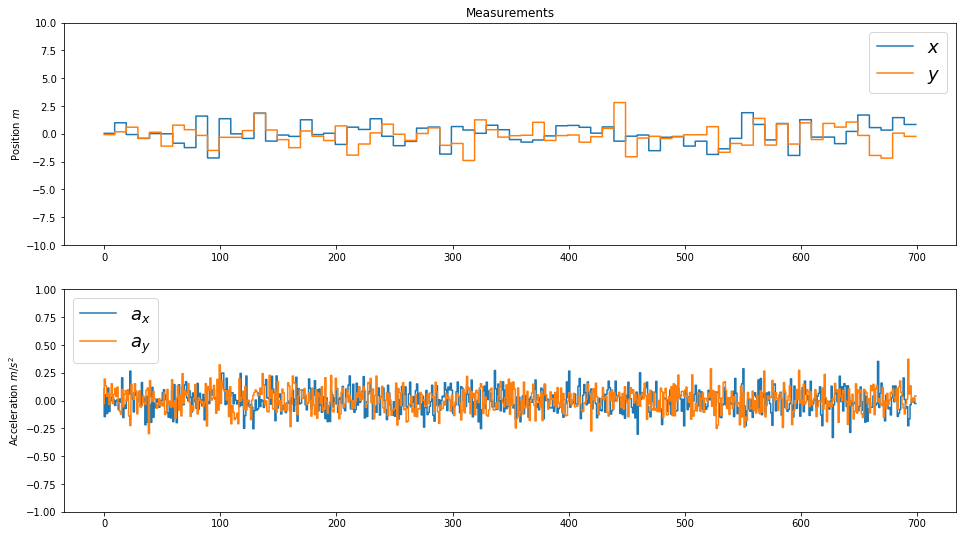

In [146]:
plot_measurements()

# **Preallocating for Plotting**

In [0]:
xt = []
yt = []
dxt = []
dyt = []
ddxt = []
ddyt = []
Zx = []
Zy = []
Px = []
Py = []
Pdx = []
Pdy = []
Pddx = []
Pddy = []
Kx = []
Ky = []
Kdx = []
Kdy = []
Kddx = []
Kddy = []

def saveStates(x, Z, P, K):
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    dxt.append(float(x[2]))
    dyt.append(float(x[3]))
    ddxt.append(float(x[4]))
    ddyt.append(float(x[5]))
    Zx.append(float(Z[0]))
    Zy.append(float(Z[1]))
    Px.append(float(P[0,0]))
    Py.append(float(P[1,1]))
    Pdx.append(float(P[2,2]))
    Pdy.append(float(P[3,3]))
    Pddx.append(float(P[4,4]))
    Pddy.append(float(P[5,5]))
    Kx.append(float(K[0,0]))
    Ky.append(float(K[1,0]))
    Kdx.append(float(K[2,0]))
    Kdy.append(float(K[3,0]))
    Kddx.append(float(K[4,0]))
    Kddy.append(float(K[5,0]))
    return [x, Z, P, K]



# **Kalman Filter Steps**


1.   Time Update (Prediction)
2.   Project the state ahead
3.   Project error cov ahead
4.   Measurement Update (Correction)
5.   IF there is GPS update, compute kalman gain
6.   Update the estimate
7.   Update the error cov
8.   Save states for plotting


In [0]:
for kalman_filter in range(m):
    x = F.dot(x)
    P = F.dot(P).dot(F.T) + Q

    if GPS[kalman_filter]:
        S = H.dot(P).dot(H.T) + R
        K = (P.dot(H.T)).dot(np.linalg.inv(S))
        Z = measurements[:,kalman_filter].reshape(H.shape[0],1)
        y = Z - H.dot(x)
        
        x = x + K.dot(y)
        P = (I - K.dot(H)).dot(P)


    saveStates(x, Z, P, K)

In [0]:
def plot_P():
    fig = plt.figure(figsize=(16,9))
    plt.subplot(211)
    plt.plot(range(len(measurements[0])),Px, label='$x$')
    plt.plot(range(len(measurements[0])),Py, label='$y$')
    plt.title('Uncertainty (Elements from Matrix $P$)')
    plt.legend(loc='best',prop={'size':22})
    plt.subplot(212)
    plt.plot(range(len(measurements[0])),Pddx, label='$\ddot x$')
    plt.plot(range(len(measurements[0])),Pddy, label='$\ddot y$')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.legend(loc='best',prop={'size':22})

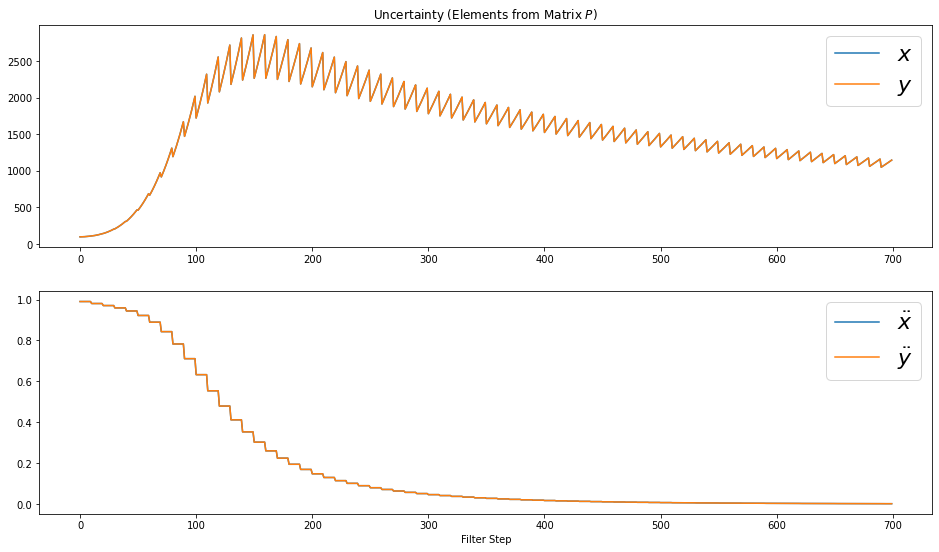

In [150]:
plot_P()

In [0]:
def plot_K_accel():
    fig = plt.figure(figsize=(16,9))
    plt.plot(range(len(measurements[0])),Kddx, label='Kalman Gain for $\ddot x$')
    plt.plot(range(len(measurements[0])),Kddy, label='Kalman Gain for $\ddot y$')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.title('Kalman Gain (the lower, the more the measurement fullfill the prediction)')
    plt.legend(loc='best',prop={'size':18})

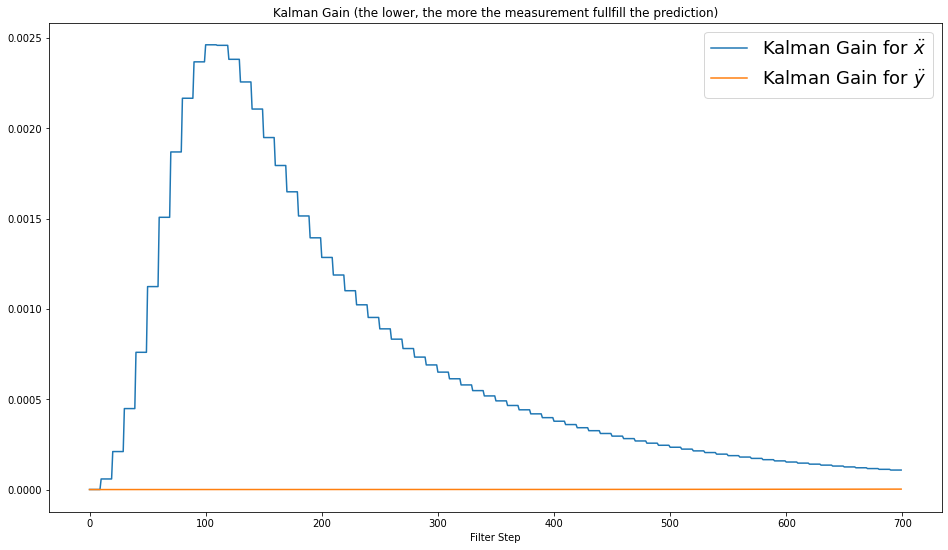

In [152]:
plot_K_accel()

In [0]:
def plot_K_pos():
    fig = plt.figure(figsize=(16,9))
    plt.plot(range(len(measurements[0])),Kx, label='Kalman Gain for $x$')
    plt.plot(range(len(measurements[0])),Ky, label='Kalman Gain for $y$')
    plt.xlabel('Filter Step for x and y')
    plt.ylabel('')
    plt.title('Kalman Gain (the lower, the more the measurement fullfill the prediction)')
    plt.legend(loc='best',prop={'size':18})

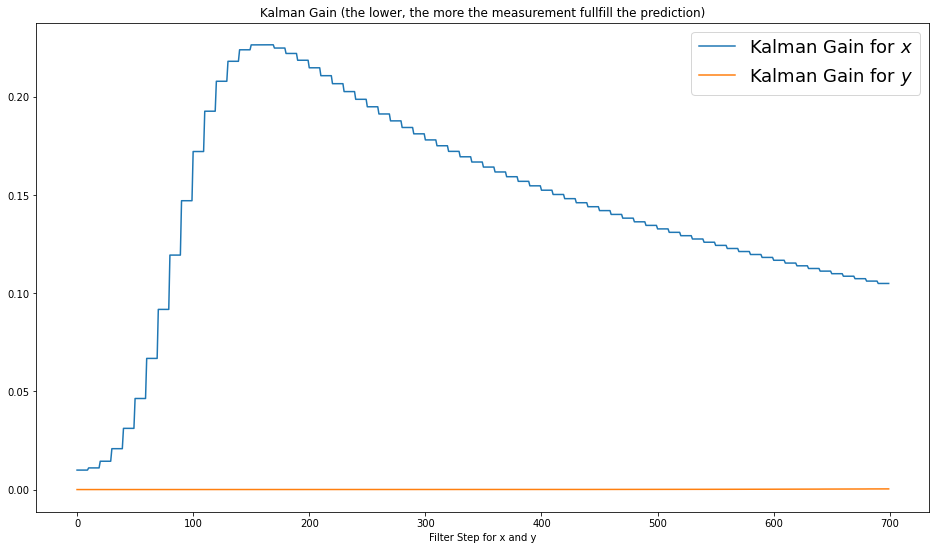

In [154]:
plot_K_pos()